## **A project by Parhinder Singh & Jaden Leonard**

In [ ]:
# importing necessary libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Load the dataset into a DataFrame
df = pd.read_csv('NY-House-Dataset.csv')

# Display the first few rows of the DataFrame to verify the import
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


**Errors in data:**
1. Address Information Redundancy
2. Inconsistent State Representation
3. Potential Data Entry Errors in BATH Column
4. Possible Inconsistencies in Administrative Area Levels

**To fix:**
1. Address Simplification
2. State and City Information
3. Bathroom Count Normalization

In [ ]:
# Preliminary cleaning
df_cleaned = df[['BROKERTITLE', 'TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'FORMATTED_ADDRESS', 'LATITUDE', 'LONGITUDE']].copy()
df_cleaned['BATH'] = df_cleaned['BATH'].apply(lambda x: round(x * 2) / 2)

# Extract City, State, and ZIP Code
def extract_location_info(address):
    parts = address.split(',')
    if len(parts) > 2:
        city = parts[-3].strip()
        state_zip = parts[-2].strip().split(' ')
        state = state_zip[0]
        zip_code = state_zip[1] if len(state_zip) > 1 else None
        return city, state, zip_code
    return None, None, None

df_cleaned[['CITY', 'STATE', 'ZIP']] = df_cleaned.apply(lambda row: pd.Series(extract_location_info(row['FORMATTED_ADDRESS'])), axis=1)

# Ensure Data Type Consistency
df_cleaned['PRICE'] = pd.to_numeric(df_cleaned['PRICE'], errors='coerce')
df_cleaned['PROPERTYSQFT'] = pd.to_numeric(df_cleaned['PROPERTYSQFT'], errors='coerce')

# Check for and Remove Duplicate Entries
df_cleaned.drop_duplicates(subset=['FORMATTED_ADDRESS', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT'], inplace=True)

# Checking for missing values in key columns and handling them
df_cleaned.dropna(subset=['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT'], inplace=True)

# After cleaning
display(df_cleaned.head(100))

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,CITY,STATE,ZIP
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,New York,NY,10022
1,Brokered by Serhant,Condo for sale,195000000,7,10.0,17545.000000,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,New York,NY,10019
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,Staten Island,NY,10312
3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,New York,NY,10022
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.5,14175.000000,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,New York,NY,10065
...,...,...,...,...,...,...,...,...,...,...,...,...
96,Brokered by Douglas Elliman - 3544 Johnson Ave,Co-op for sale,1295000,4,2.0,1995.000000,"2501 Palisade Ave #2, Bronx, NY 10463, USA",40.880987,-73.922434,Bronx,NY,10463
97,Brokered by Sowae Corp,House for sale,245000,3,1.0,2184.207862,"2942 Lurting Ave, Bronx, NY 10469, USA",40.869011,-73.856444,Bronx,NY,10469
98,Brokered by Americas Real Estate Advisors,House for sale,400000,7,3.0,2385.000000,"340 E 234th St, Bronx, NY 10470, USA",40.896915,-73.865498,Bronx,NY,10470
99,Brokered by Douglas Elliman - 575 Madison Ave,House for sale,55000000,8,8.0,12000.000000,"25 Riverside Dr, New York, NY 10023, USA",40.782238,-73.984632,New York,NY,10023


In [ ]:
# Filter the dataset to include only the main property types
main_property_types = ['Co-op for sale', 'House for sale', 'Condo for sale', 'Multi-family home for sale', 'Townhouse for sale']
df_filtered = df_cleaned[df_cleaned['TYPE'].isin(main_property_types)]

# Perform ANOVA to compare the prices across different property types
anova_result = stats.f_oneway(
    df_filtered[df_filtered['TYPE'] == 'Co-op for sale']['PRICE'],
    df_filtered[df_filtered['TYPE'] == 'House for sale']['PRICE'],
    df_filtered[df_filtered['TYPE'] == 'Condo for sale']['PRICE'],
    df_filtered[df_filtered['TYPE'] == 'Multi-family home for sale']['PRICE'],
    df_filtered[df_filtered['TYPE'] == 'Townhouse for sale']['PRICE']
)

print(f"ANOVA test statistic: {anova_result.statistic}")
print(f"p-value: {anova_result.pvalue}")

ANOVA test statistic: 2.0333571714924368
p-value: 0.08701901255279075


We fail to reject this hypothesis because we can see that it is greater than our p value is greater than the alpha value.

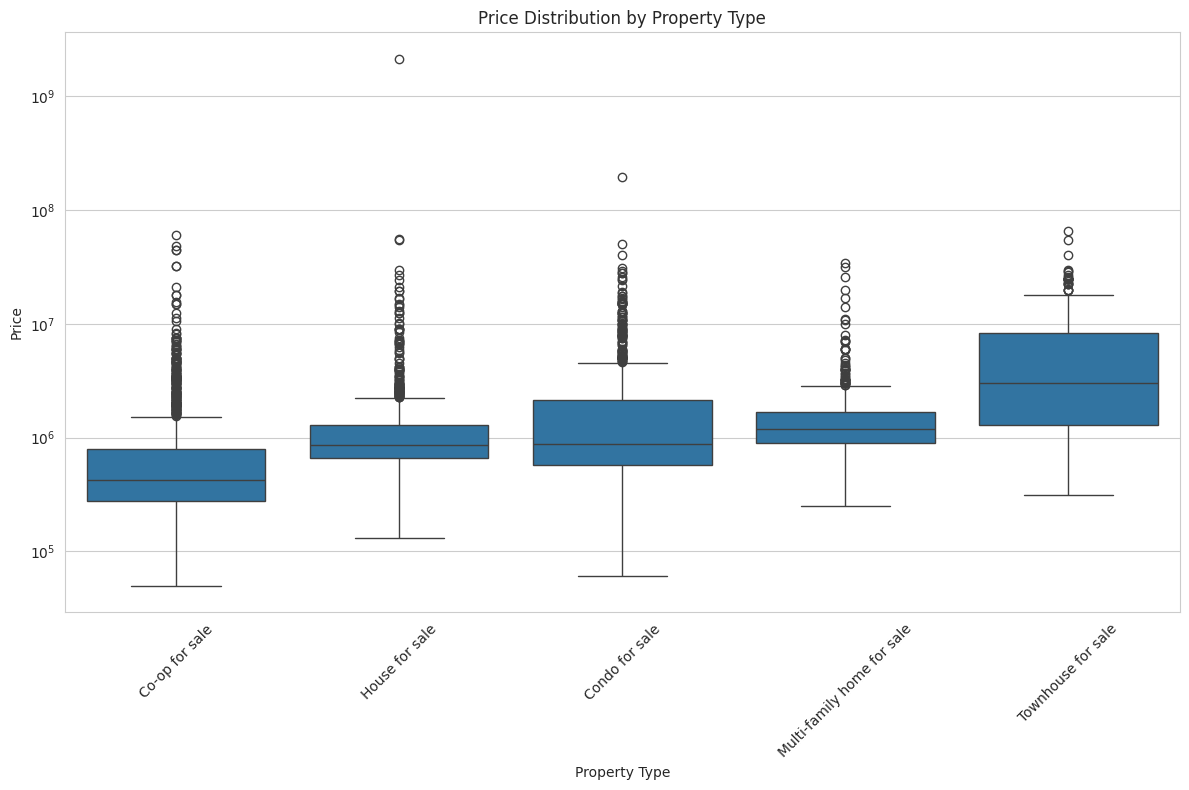

In [ ]:
# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a boxplot to visualize the distribution of prices for each property type
plt.figure(figsize=(12, 8))
sns.boxplot(x='TYPE', y='PRICE', data=df_filtered, order=main_property_types)
plt.title('Price Distribution by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.yscale('log')  # Using a logarithmic scale for better visualization of wide price ranges
plt.tight_layout()

# Show the plot
plt.show()

**Null Hypothesis:** The CITY has an effect on the TYPE

**Alt Hypothesis:** The CITY does not have an effect on the TYPE

**alpha value of 0.05**

In [ ]:
from scipy.stats import chi2_contingency

# Creating a contingency table for "CITY" and "TYPE"
contingency_table = pd.crosstab(df_cleaned['CITY'], df_cleaned['TYPE'])

# Performing the Chi-square test of independence
_, p_value, _, _ = chi2_contingency(contingency_table)

print(p_value)

1.4430841991519135e-222


With the extremly low p-value that is far lesser than our chosen alpha value of 0.05, we choose to reject the null hypothesis that the CITY has an effect on the TYPE.

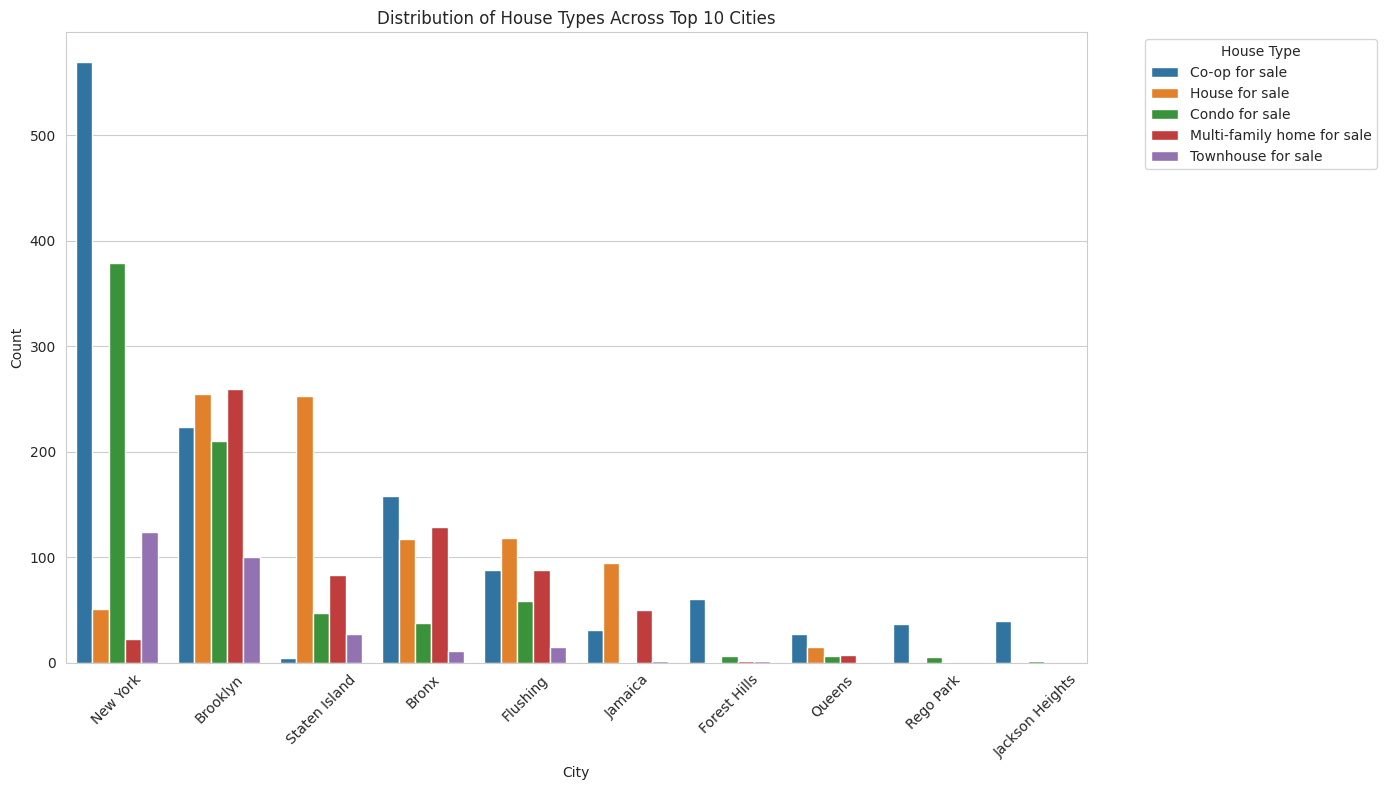

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Limiting the data to the top 10 cities by frequency to keep the chart readable
top_cities = df_cleaned['CITY'].value_counts().head(10).index

# Further limiting the data to the top house types for visualization
top_types = df_cleaned['TYPE'].value_counts().head(5).index

# Filtering the DataFrame to include only rows that match the top cities and types
filtered_df = df_cleaned[df_cleaned['CITY'].isin(top_cities) & df_cleaned['TYPE'].isin(top_types)]

# Creating the plot
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_df, x='CITY', hue='TYPE', order=top_cities, hue_order=top_types)
plt.title('Distribution of House Types Across Top 10 Cities')
plt.xticks(rotation=45)
plt.xlabel('City')
plt.ylabel('Count')
plt.legend(title='House Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import norm

# Assuming population_mean and population_std are known
population_mean = 500000  # Hypothetical national average price
population_std = 150000   # Known standard deviation of national prices

# Filter the dataset for a specific category (e.g., condos)
sample_data = df_cleaned[df_cleaned['TYPE'] == 'Condo for sale']
sample_mean = sample_data['PRICE'].mean()
sample_size = len(sample_data)

# Calculate the Z-score
z_score = (sample_mean - population_mean) / (population_std / (sample_size**0.5))

# Calculate the p-value for a two-tailed test
p_value = 2 * norm.sf(abs(z_score))

print(f"Sample Mean: {sample_mean}, Sample Size: {sample_size}, Z-Score: {z_score}, P-Value: {p_value}")


Sample Mean: 2615780.1448931117, Sample Size: 842, Z-Score: 409.29394888287743, P-Value: 0.0


We can reject the null hypothesis because the z score is extremely high and far beyond the typical critical values for common significance levels. This indicates a very strong deviation from the null hypothesis.

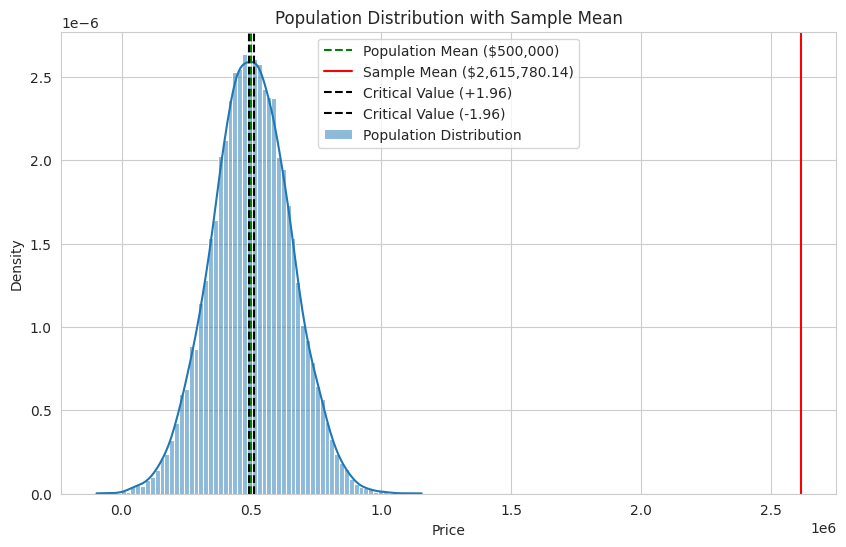

In [ ]:
# Assume population_mean, population_std, and sample_mean are defined
population_dist = np.random.normal(population_mean, population_std, 10000)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(population_dist, kde=True, stat='density', label='Population Distribution')
plt.axvline(x=population_mean, color='green', linestyle='--', label='Population Mean ($500,000)')
plt.axvline(x=sample_mean, color='red', linestyle='-', label=f'Sample Mean (${sample_mean:,.2f})')

# Marking critical regions for alpha = 0.05 in a two-tailed test
plt.axvline(x=population_mean + 1.96 * population_std / np.sqrt(sample_size), color='black', linestyle='--', label='Critical Value (+1.96)')
plt.axvline(x=population_mean - 1.96 * population_std / np.sqrt(sample_size), color='black', linestyle='--', label='Critical Value (-1.96)')

plt.title('Population Distribution with Sample Mean')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.show()